In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#importing geojson file with income/census tract.
income=gpd.read_file('acs2019_5yr_B19301_14000US06037222001.geojson')

In [10]:
#The next two commands give us a good idea of how the data is organized.
income.head(10)

geoid                                   name  B19301001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA    29457.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA    45515.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA    21726.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA    23545.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA    37189.0   
5  14000US06037101400     Census Tract 1014, Los Angeles, CA    36046.0   
6  14000US06037102103  Census Tract 1021.03, Los Angeles, CA    38758.0   
7  14000US06037102104  Census Tract 1021.04, Los Angeles, CA    37471.0   
8  14000US06037102105  Census Tract 1021.05, Los Angeles, CA    25704.0   
9  14000US06037102107  Census Tract 1021.07, Los Angeles, CA    38146.0   

   B19301001, Error                                           geometry  
0            3651.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1            6571.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2            3829.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3            3092.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4            3899.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  
5            4848.0  MULTIPOLYGON (((-118.32238 34.24963, -118.3221...  
6            7797.0  MULTIPOLYGON (((-118.36533 34.22870, -118.3639...  
7            5747.0  MULTIPOLYGON (((-118.35620 34.21971, -118.3559...  
8            4420.0  MULTIPOLYGON (((-118.35307 34.20878, -118.3530...  
9            3665.0  MULTIPOLYGON (((-118.36789 34.23939, -118.3678...

In [11]:
income.shape

(1005, 5)

In [12]:
#Let's rename the columns to make them more identifiable.
income.columns=['Census_Tract', 'Friendly Font', 'PCI', 'Margin of Error', 'geometry']

In [13]:
income.head()

Census_Tract                          Friendly Font      PCI  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  29457.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  45515.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  21726.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  23545.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  37189.0   

   Margin of Error                                           geometry  
0           3651.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1           6571.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2           3829.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3           3092.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4           3899.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

In [34]:
income_tracts=income[['PCI','geometry']]

In [37]:
income_tracts.head()

PCI                                           geometry
0  29457.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...
1  45515.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...
2  21726.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...
3  23545.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...
4  37189.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

In [15]:
#Getting some basic stats
income['PCI'].describe()

count       998.000000
mean      36323.018036
std       25588.805704
min        6220.000000
25%       18627.750000
50%       26992.000000
75%       46685.250000
max      157392.000000
Name: PCI, dtype: float64

<AxesSubplot:ylabel='Frequency'>

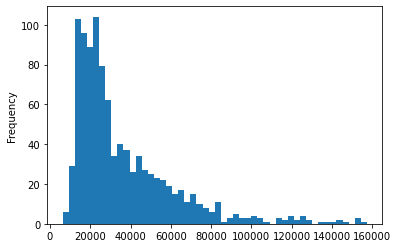

In [16]:
income['PCI'].plot.hist(bins=50)

Looks like the majority of PCI in the county leans towards the lower side of the income scale...

<AxesSubplot:>

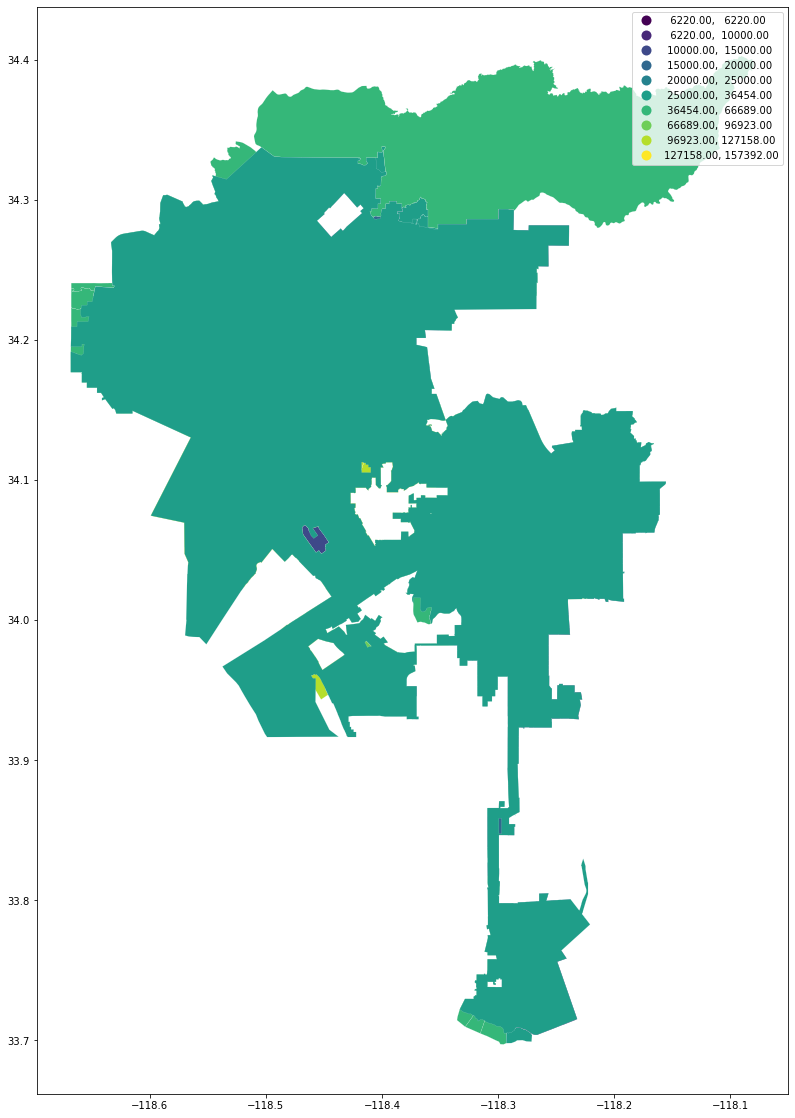

In [36]:
#Creating definitions for income levels based on breaks provided by census bureau, 
#and accounting for the fact that the majority of census tracts fall between 10k-36k income 
#per capita
income_tracts.plot(figsize=(20,20),
            column='PCI',
            legend=True,
            scheme='user_defined', # to use custom breaks
            classification_kwds={'bins':[6220,10000, 15000,20000,25000,36454,66689,96923,127158,157392]},
            edgecolor='white', 
            linewidth=.1,
           )

OKAY, I've been trying for hours to get the colors to appear more accurately. 
It's supposed to look like this: https://censusreporter.org/data/map/?table=B19301&geo_ids=16000US0644000,140|16000US0644000&primary_geo_id=16000US0644000.

I've tried my best,your understanding is appreciated :)
Please let me know if I'm missing anything. I've restarted my machine several times

In [28]:
lincome=[income['PCI']<36454]
midincome=[income['PCI']<66689]
hiincome=[income['PCI']<157392]

AttributeError: 'list' object has no attribute 'plot'